# Here are the main steps we will go through :
### 1- Importing The Modules and Dataset.
### 2- Discover and visualize the data to gain insights.
### 3- Cleaning and Data Preprocessing .
### 4- Split Data.
### 5- Train The Model.
### 6- Conclusion

# 1- Importing The Modules and Dataset.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
%matplotlib inline

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from graphviz import Source
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix,accuracy_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [3]:
df =  pd.read_csv('healthcare-dataset-stroke-data.csv')

# 2- Discover and visualize the data to gain insights.

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [8]:
df = df.drop('id', axis=1)

In [9]:
df.describe(exclude=['int64','float']).T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [10]:
# split data to numrical and categorical
numerical_features= df.select_dtypes(include=['int64', 'float64']).copy()
categorical_features = df.select_dtypes(include=['object']).copy()

In [11]:
print ('The numerical features :')
for c in numerical_features:
    print ('  -',c)
print ('===========================')
print ('The categorical features :')
for c in categorical_features:
    print ('  -',c)

The numerical features :
  - age
  - hypertension
  - heart_disease
  - avg_glucose_level
  - bmi
  - stroke
The categorical features :
  - gender
  - ever_married
  - work_type
  - Residence_type
  - smoking_status


In [12]:
for c in categorical_features:
    print('=============',c,'============\n\n\n',categorical_features[c].value_counts(),'\n\n\n')

============= gender ============


 gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64 



============= ever_married ============


 ever_married
Yes    3353
No     1757
Name: count, dtype: int64 



============= work_type ============


 work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64 



============= Residence_type ============


 Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64 



============= smoking_status ============


 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64 





### We will visualize data to know more. 

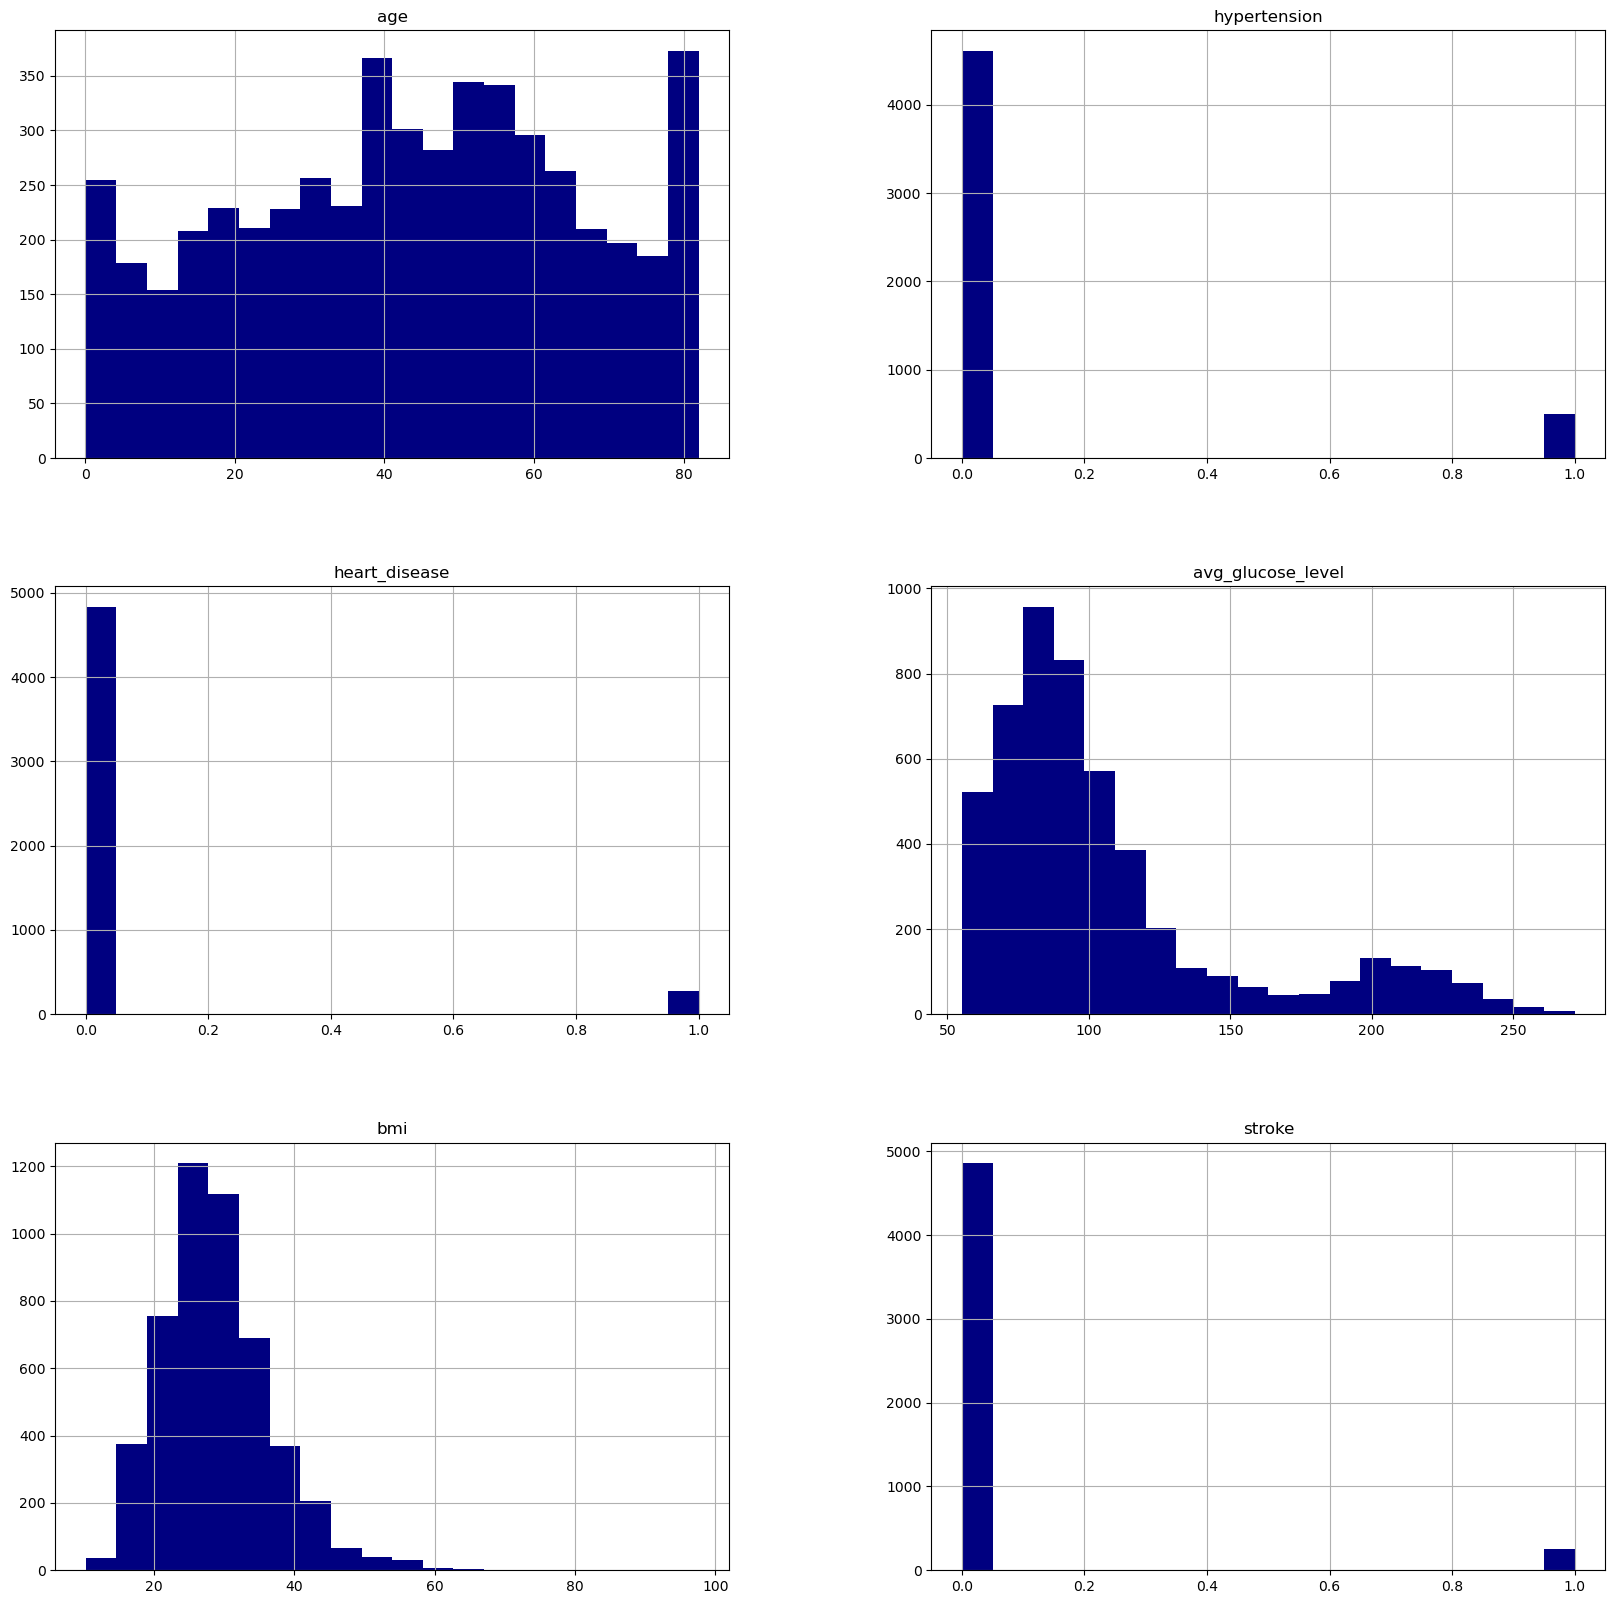

In [13]:
numerical_features.hist(bins=20, figsize=(20,20),color= 'navy')
plt.show()

# 3- Cleaning and Data Preprocessing .

In [14]:
df.duplicated().sum()

0

In [15]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
# missing values imputation

df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [17]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
stroke = df

In [19]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


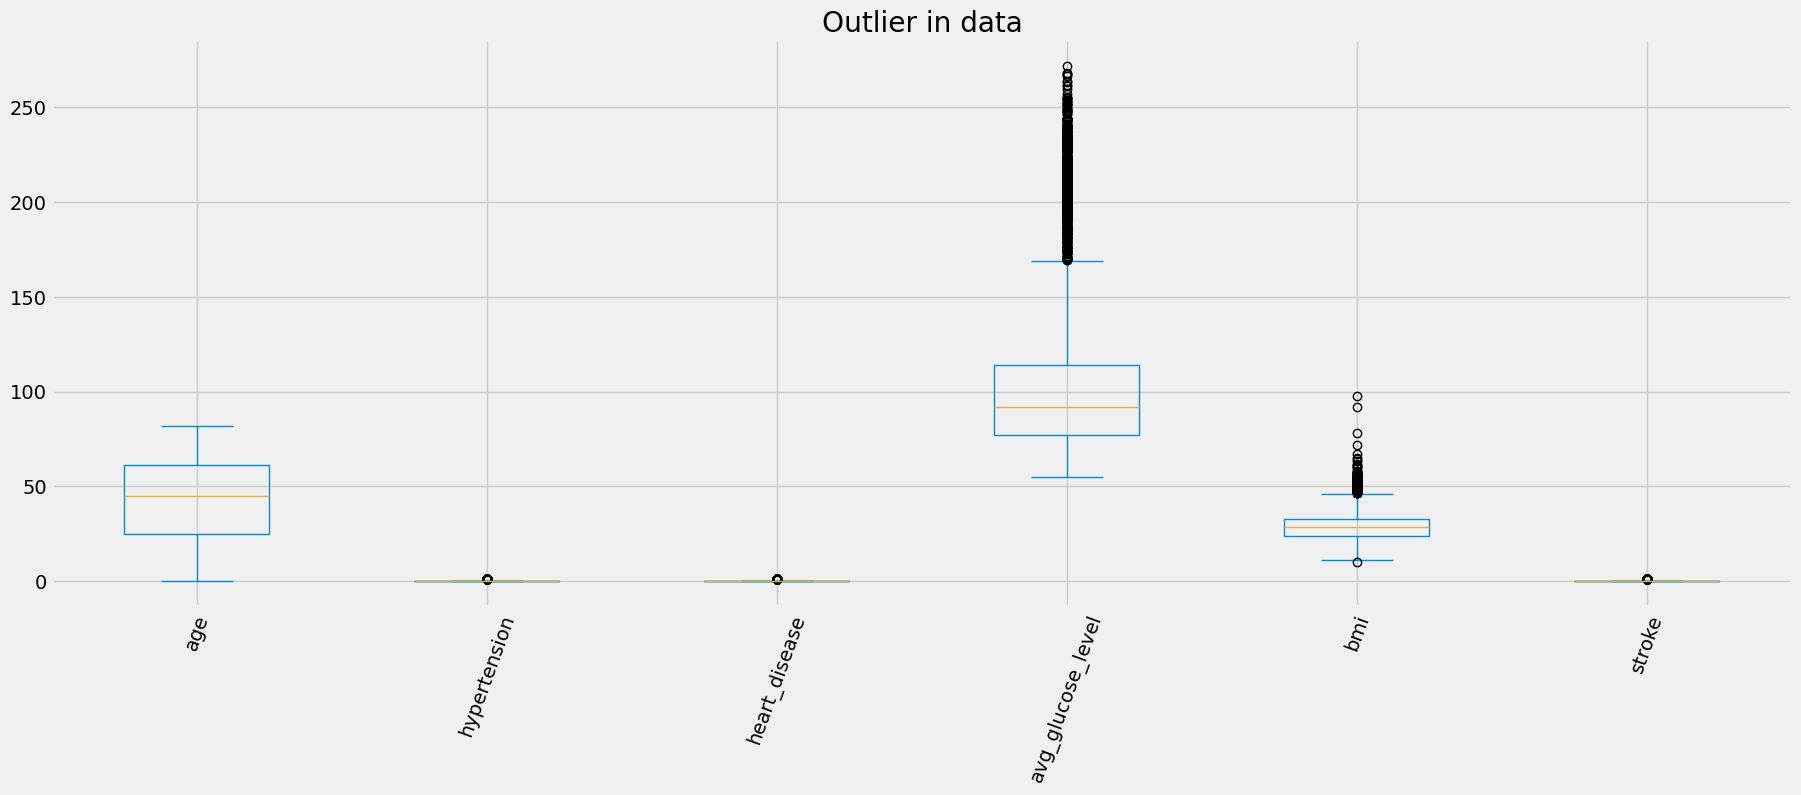

In [20]:
# outlier
#"""
plt.style.use('fivethirtyeight')
outlier= stroke.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

#"""

In [21]:
#Handel Outlayers
#"""
def treat_outlier(x):
    sorted(x)
    q1,q3=np.percentile(x,[25,75])
    iqr=q3-q1
    l_r=q1-(1.5*iqr)
    u_r=q3+(1.5*iqr)
    return l_r,u_r  
#""

In [22]:
num_columns = ['age','avg_glucose_level','bmi']

In [23]:
#"""
# cont Handel Outlayers
for i in stroke[num_columns].columns:
    lr,ur = treat_outlier(df[i])
    df[i] = np.where(df[i]>ur,ur,df[i])
    df[i] = np.where(df[i]<lr,lr,df[i])
#"""

Text(0.5, 1.0, 'Outlier in data')

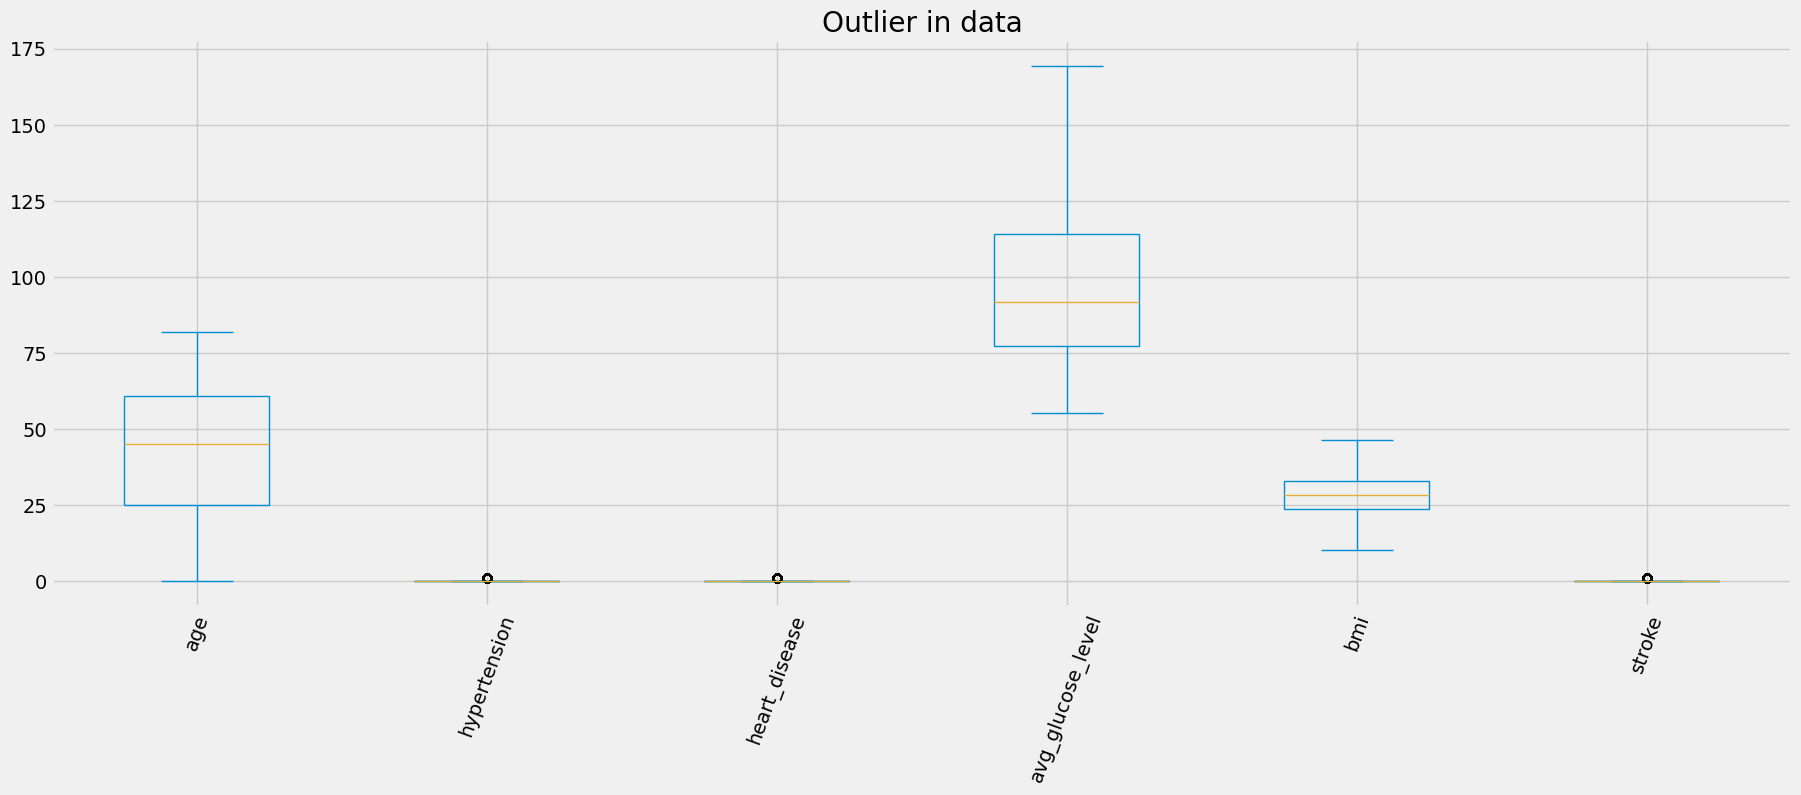

In [24]:
#cont Handel outlier

plt.style.use('fivethirtyeight')
outlier= stroke.plot(kind='box',figsize=(20,7))
plt.xticks(rotation=70)
plt.title('Outlier in data')

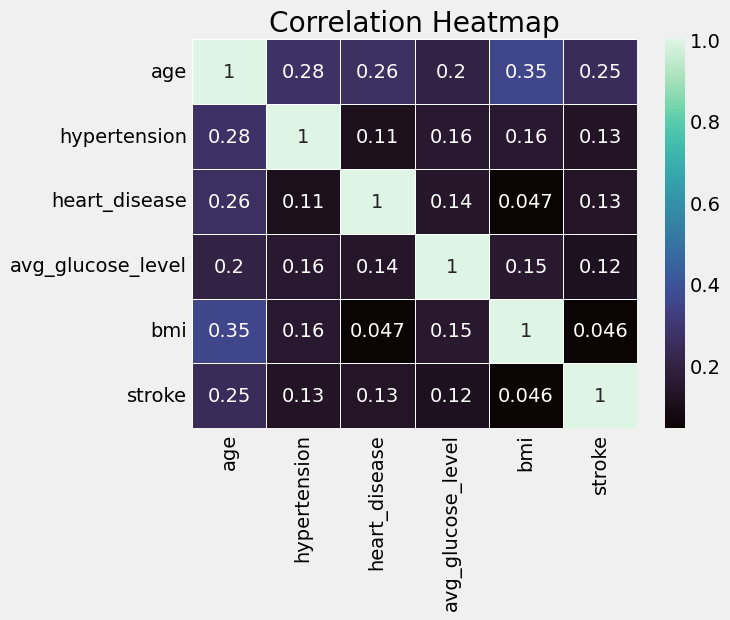

In [25]:
num = stroke.corr(numeric_only= True)
sns.heatmap(num, annot= True, linewidths= 0.5,cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

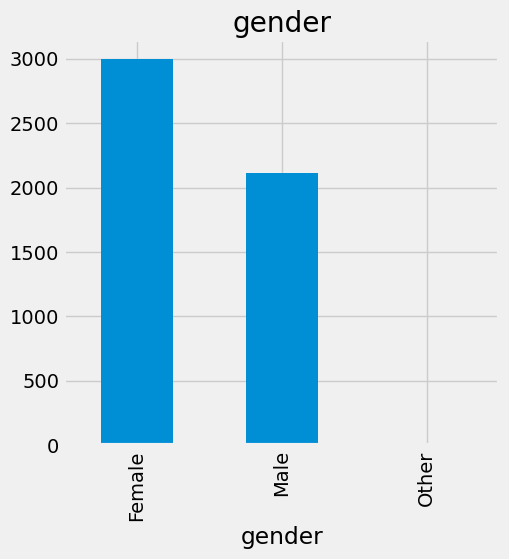

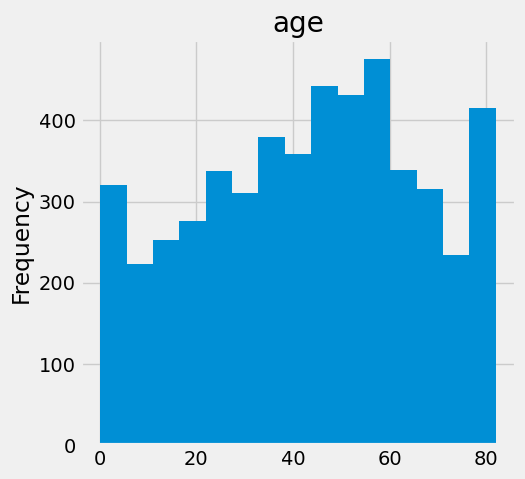

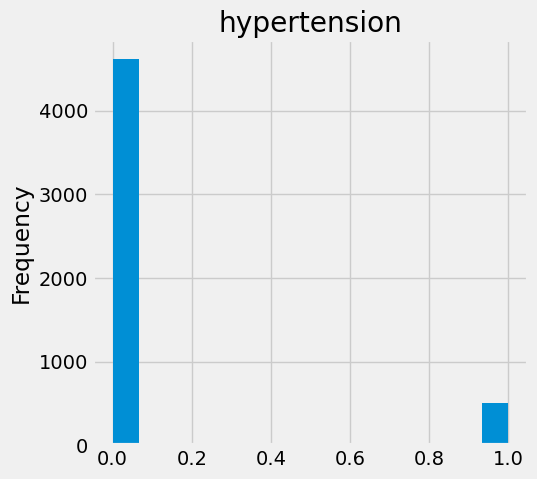

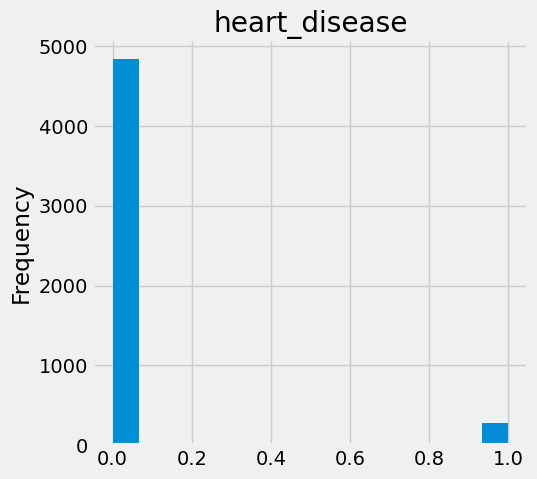

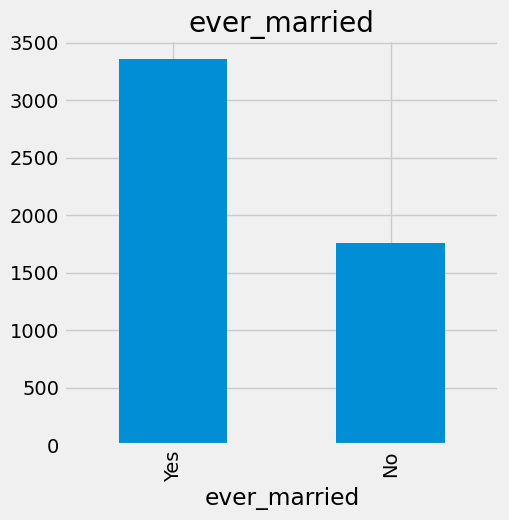

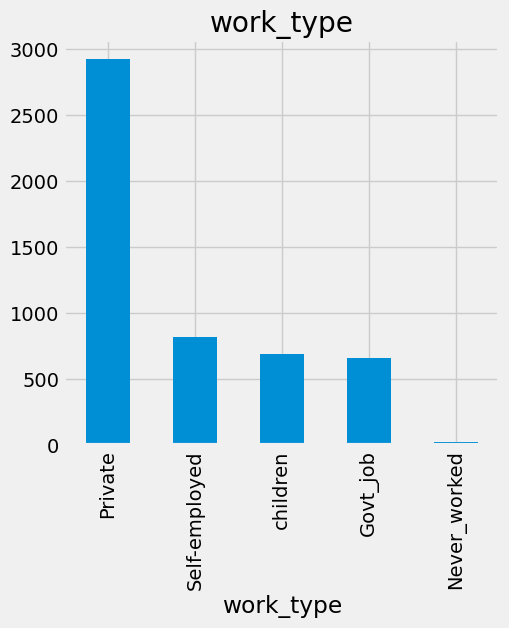

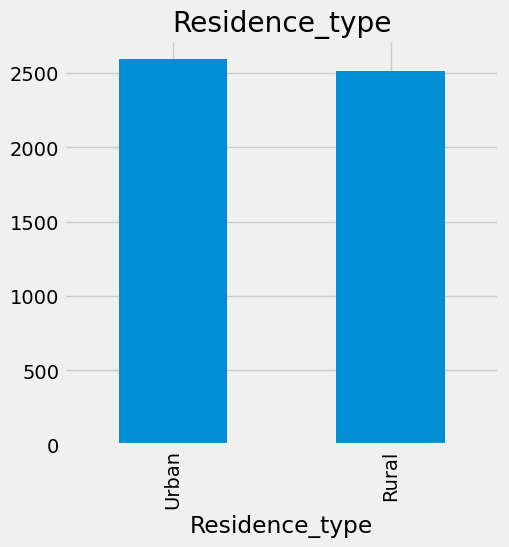

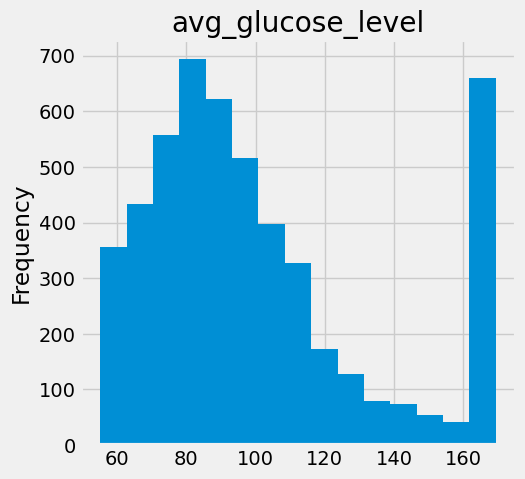

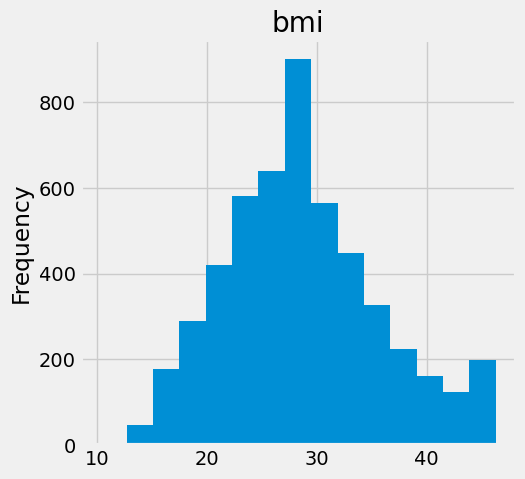

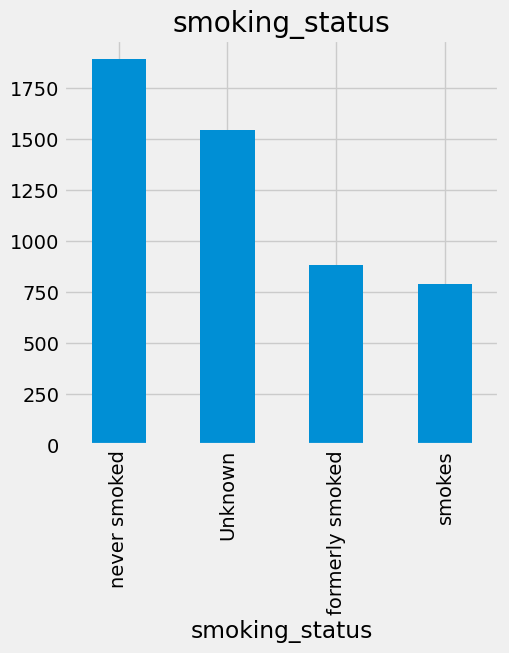

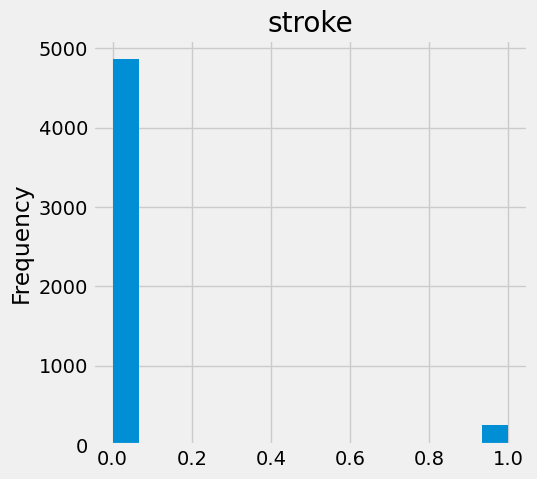

In [26]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
for column in stroke:
    plt.figure(column, figsize = (5, 5))
    plt.title(column)
    if is_numeric_dtype(stroke[column]):
        stroke[column].plot(kind = 'hist', bins=15)
    elif is_string_dtype(stroke[column]):
        stroke[column].value_counts()[:10].plot(kind = 'bar')

In [27]:
stroke = stroke[stroke['gender'] != 'Other']

In [28]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [29]:
print(stroke['gender'].value_counts())

gender
Female    2994
Male      2115
Name: count, dtype: int64


In [30]:
stroke['gender'].dtype == 'object'

True

In [31]:
LE = LabelEncoder()
for i in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    stroke[i] = LE.fit_transform(stroke[i])


In [32]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,169.3575,36.600000,1,1
1,0,61.0,0,0,1,3,0,169.3575,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.9200,32.500000,2,1
3,0,49.0,0,0,1,2,1,169.3575,34.400000,3,1
4,0,79.0,1,0,1,3,0,169.3575,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.7500,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.2000,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.9900,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.2900,25.600000,1,0


In [33]:
stroke.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5109.0,0.413975,0.492592,0.00,0.00,0.00,1.00,1.0000
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.0000
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.0000
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.0000
ever_married,5109.0,0.656293,0.474991,0.00,0.00,1.00,1.00,1.0000
work_type,5109.0,2.167743,1.090398,0.00,2.00,2.00,3.00,4.0000
Residence_type,5109.0,0.508123,0.499983,0.00,0.00,1.00,1.00,1.0000
avg_glucose_level,5109.0,100.987918,33.212706,55.12,77.24,91.88,114.09,169.3575
bmi,5109.0,28.722850,7.120088,10.30,23.80,28.40,32.80,46.3000
smoking_status,5109.0,1.376982,1.071626,0.00,0.00,2.00,2.00,3.0000


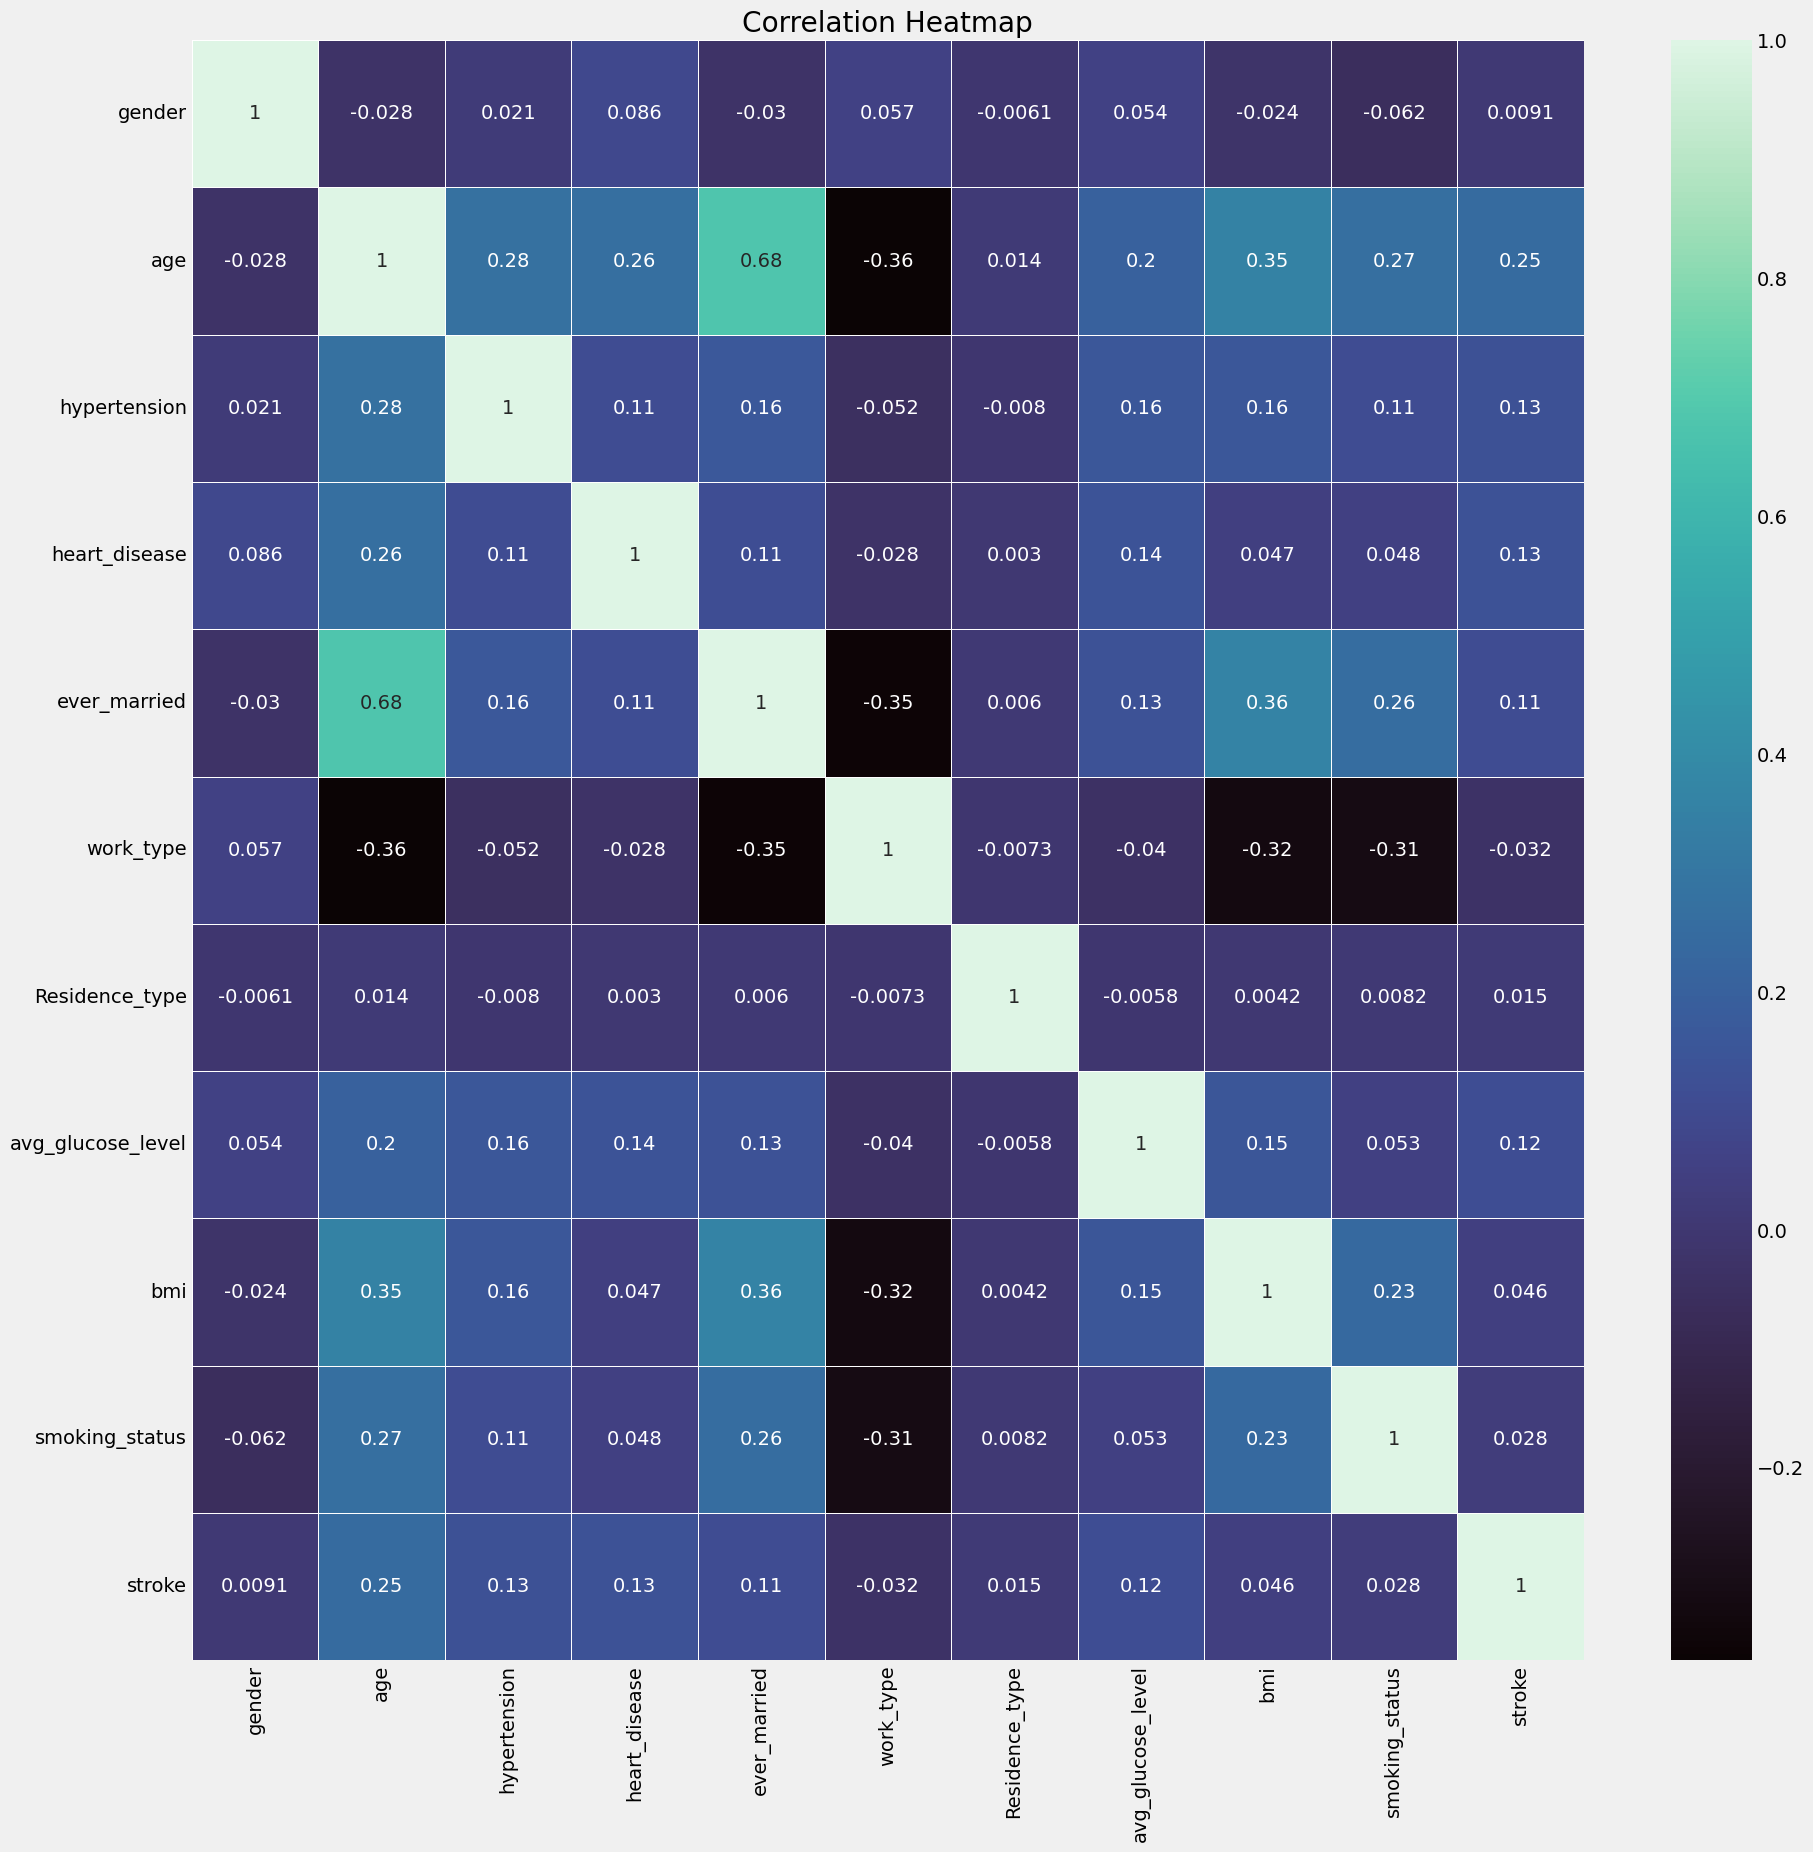

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(stroke.corr(), annot= True, linewidths= 0.5,cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

# 4- Split Data.

In [35]:
## drop target variable for training

X = stroke.drop(['stroke'],axis = 1)
y = stroke.pop('stroke')

In [36]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,169.3575,36.600000,1
1,0,61.0,0,0,1,3,0,169.3575,28.893237,2
2,1,80.0,0,1,1,2,0,105.9200,32.500000,2
3,0,49.0,0,0,1,2,1,169.3575,34.400000,3
4,0,79.0,1,0,1,3,0,169.3575,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.7500,28.893237,2
5106,0,81.0,0,0,1,3,1,125.2000,40.000000,2
5107,0,35.0,0,0,1,3,0,82.9900,30.600000,2
5108,1,51.0,0,0,1,2,0,166.2900,25.600000,1


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3576, 10), (1533, 10), (3576,), (1533,))

4039    0
576     0
4013    0
4536    0
1180    0
       ..
4427    0
466     0
3092    0
3773    0
860     0
Name: stroke, Length: 3576, dtype: int64


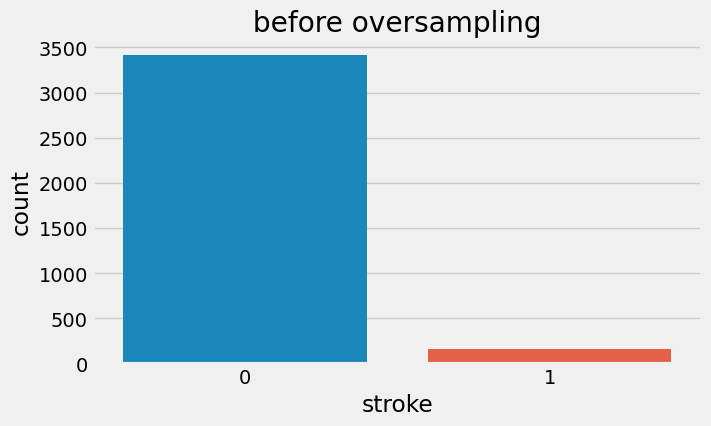

In [38]:
plt.figure(figsize=(7,4))
sns.countplot(x=y_train)
plt.title(' before oversampling ')
print(y_train)## percentage of Stroke labels

### SMOTE oversampling

In [39]:
SMOTE_oversample = SMOTE(random_state=1)
X_train,y_train = SMOTE_oversample.fit_resample(X_train, y_train.ravel())

[0 0 0 ... 1 1 1]


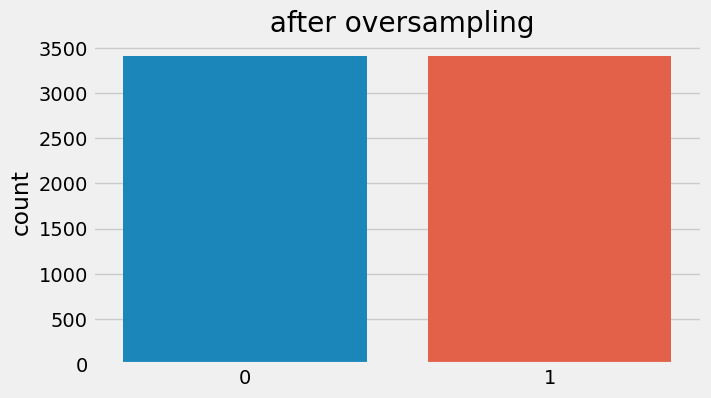

In [40]:
plt.figure(figsize=(7,4))
sns.countplot(x=y_train)
plt.title(' after oversampling')
print(y_train)## percentage of Stroke labels

In [41]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,1,31.0,0,0,0,3,0,64.85,23.0,0
4478,1,40.0,0,0,1,3,0,65.29,28.3,2
3521,1,52.0,0,0,1,2,0,111.04,30.0,2
4355,0,79.0,1,0,1,3,0,76.64,19.5,2
3826,0,75.0,0,0,1,0,0,94.77,27.2,2
...,...,...,...,...,...,...,...,...,...,...
818,1,20.0,0,0,0,0,0,106.97,27.9,1
4829,1,66.0,0,0,1,2,0,67.92,31.1,1
611,1,42.0,0,0,1,0,1,93.79,27.2,2
3082,0,57.0,0,0,1,2,0,69.40,24.0,0


In [42]:
# Feature Scalling using StandardScaler
## Scaling data

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
(X[0], y[0])

(array([ 1.18979109,  1.05124201, -0.32863749,  4.18459909,  0.72367818,
        -0.15385177,  0.983884  ,  2.05873841,  1.10643593, -0.3518194 ]),
 1)

# 5- Train The Model.

## Artificial Neural Network (ANN)


In [44]:
# Create a Sequential Model to add layer for the ANN
ann = Sequential()

In [45]:
# Add the first layer with 16 units and ReLU activation function
ann.add(Dense(units=16, activation='relu', input_shape=(10,)))

# Add the second layer with 8 units and ReLU activation function
ann.add(Dense(units=8, activation='relu'))

# Add the last layer with 1 unit and sigmoid activation function for binary classification
ann.add(Dense(units=1, activation='sigmoid'))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\ziadh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Train the ANN with 100 epochs.
history = ann.fit(X_train, y_train, batch_size = 30, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6111 - loss: 0.6112 - val_accuracy: 0.7678 - val_loss: 0.4354
Epoch 2/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8128 - loss: 0.4169 - val_accuracy: 0.7945 - val_loss: 0.4098
Epoch 3/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8280 - loss: 0.3770 - val_accuracy: 0.7965 - val_loss: 0.4018
Epoch 4/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8263 - loss: 0.3699 - val_accuracy: 0.7906 - val_loss: 0.4174
Epoch 5/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8457 - loss: 0.3447 - val_accuracy: 0.7841 - val_loss: 0.4324
Epoch 6/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.8438 - loss: 0.3483 - val_accuracy: 0.8037 - val_loss: 0.4056
Epoch 7/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8589 - loss: 0.3241 - val_accuracy: 0.7776 - val_loss: 0.4377
Epoch 8/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8572 - loss: 0.3275 - val_ac

In [48]:
y_predict = ann.predict(X_test)
y_predict = (y_predict > 0.5)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [49]:
# A confusion matrix 
cm_NN = confusion_matrix(y_test, y_predict)
NN_accuracy = accuracy_score(y_test, y_predict)
NN_accuracy, cm_NN

(0.8232224396607958,
 array([[1232,  212],
        [  59,   30]], dtype=int64))

In [50]:
# drawing confusion matrix
fig2 = ff.create_annotated_heatmap(cm_NN, colorscale='balance_r', showscale=True)
fig2.update_layout(height=500, 
                  width=600, 
                  showlegend=True,
                 )

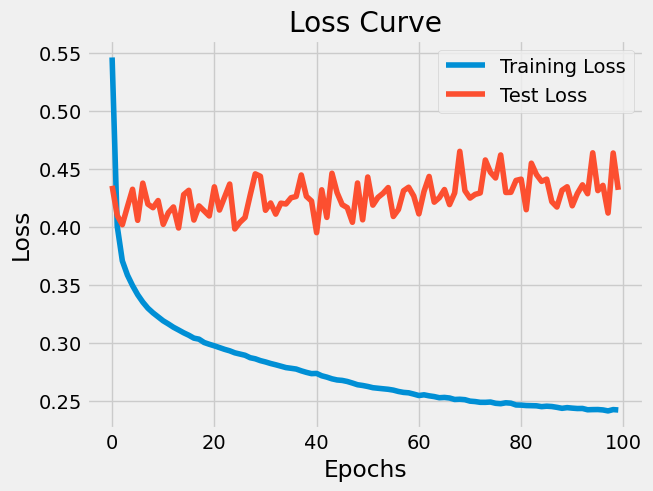

In [51]:
# Extract loss values from the training history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Decision Tree Classifier

In [52]:
DT_model= DecisionTreeClassifier()

# fit the model
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
# model score
predict_train_DT = DT_model.predict(X_train)
predict_test_DT = DT_model.predict(X_test)

In [54]:
# accuracy score
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test,y_test)

In [55]:
# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)

In [56]:
print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))

Accuracy on Train set 1.0
Accuracy on Test set 0.8741030658838878
F1-score on Test set: 0.21862348178137653


              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1444
           1       0.17      0.30      0.22        89

    accuracy                           0.87      1533
   macro avg       0.56      0.61      0.58      1533
weighted avg       0.91      0.87      0.89      1533



In [57]:
parameters= {'max_depth':[7,10],
            'max_features':[4,5,6],
            'min_samples_split' : [90,100],
            'min_samples_leaf' : [20,30]}


DT = DecisionTreeClassifier()

DT_model_tune = GridSearchCV(DT, param_grid = parameters, cv=3)

DT_model_tune.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [20, 30],
                         'min_samples_split': [90, 100]})

In [58]:
DT_model_tune.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 90}

In [59]:
DT_model_tune= DecisionTreeClassifier(min_samples_split=100,min_samples_leaf= 20,
 max_features= 6,max_depth=10)

# fit the model
DT_model_tune.fit(X_train,y_train)

# model score
predict_train_DT = DT_model_tune.predict(X_train)
predict_test_DT = DT_model_tune.predict(X_test)

# accuracy score
DT_train_score = DT_model_tune.score(X_train,y_train)
DT_test_score = DT_model_tune.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)
DT_recall = metrics.recall_score(y_test, predict_test_DT)

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))

Accuracy on Train set 0.8669496487119438
Accuracy on Test set 0.8049575994781474
F1-score on Test set: 0.20266666666666666


              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1444
           1       0.13      0.43      0.20        89

    accuracy                           0.80      1533
   macro avg       0.55      0.63      0.55      1533
weighted avg       0.91      0.80      0.85      1533



In [60]:
gender_list = ['Male', 'Female', 'Other']

ever_married_list = ['Yes', 'No']

work_type_list = ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']

Residence_type_list = ['Urban', 'Rural']

smoking_status_list = ['formerly smoked', 'never smoked', 'smokes', 'Unknown']

#num list
hypertension_list=['Yes','No']
heart_disease_list=['Yes','No']

stroke_list=['NO','Yes']

# convert list to dictionary
# Industry_Sector_dict = {Industry_Sector_index: index for index, Industry_Sector_index in enumerate(list.Industry_Sector_list)}
gender_dict = {gender_index: index for index, gender_index in enumerate(gender_list)}
hypertension_dict = {hypertension_index: index for index, hypertension_index in enumerate(hypertension_list)}
heart_disease_dict = {heart_disease_index: index for index, heart_disease_index in enumerate(heart_disease_list)}
ever_married_dict = {ever_married_index: index for index, ever_married_index in enumerate(ever_married_list)}
work_type_dict = {work_type_index: index for index, work_type_index in enumerate(work_type_list)}
Residence_type_dict = {Residence_index: index for index, Residence_index in enumerate(Residence_type_list)}
smoking_status_dict = {smoking_status_index: index for index, smoking_status_index in enumerate(smoking_status_list)}

# gender-	age-	  hypertension-	 heart_disease-	 ever_married-	 work_type-	Residence_type	avg_glucose_level	bmi    	smoking_status
# Encoded Function
def encode_fun(gender_class, age_class, hypertension_class, heart_disease_class, ever_married_class, work_type_class, Residence_type_class, avg_glucose_level_class, bmi_class, smoking_status_class):
    gender_label = gender_dict[gender_class]
    hypertension_label = hypertension_dict[hypertension_class]
    heart_disease_label = heart_disease_dict[heart_disease_class]
    ever_married_lable= ever_married_dict[ever_married_class]
    work_type_label = work_type_dict[work_type_class]
    Residence_type_label = Residence_type_dict[Residence_type_class]
    smoking_status_label = smoking_status_dict[smoking_status_class]
    return gender_label, age_class, hypertension_label, heart_disease_label, ever_married_lable, work_type_label, Residence_type_label, avg_glucose_level_class, bmi_class, smoking_status_label
  
# Scaler Function
def scale_fun(scaler_, data):
    return scaler_.transform(data) 

encoded_data = encode_fun('Male', 25, 'Yes',  'Yes', 'Yes', 'Private', 'Urban', 100, 70, 'smokes')
data_to_classification = pd.DataFrame([encoded_data], columns=['gender','age','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'])
    
print(data_to_classification)

# Scale data
scaled_data = scale_fun(scaler, data_to_classification)
scaled_data
# stroke state
stroke_state = ann.predict(scaled_data)[0]
# st.write(stroke_state)
# stroke_state_decode=decode_fen(stroke_state)
if( stroke_state == 0 ):
    # st.success(f"Stroke State: He has No Stroke ")
    print(f"Stroke State: He has No Stroke ")
else:
    # st.warning(f"Stroke State: He has Stroke ")
    print(f"Stroke State: He has Stroke ")


   gender  age  hypertension  heart_disease  ever_married  work_type  \
0       0   25             0              0             0          0   

   Residence_type  avg_glucose_level  bmi  smoking_status  
0               0                100   70               2  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Stroke State: He has Stroke 


In [61]:
# Test
#   Data in Lists
gender_list = ['Male', 'Female', 'Other']
ever_married_list = ['Yes', 'No']
work_type_list = ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Residence_type_list = ['Urban', 'Rural']
smoking_status_list = ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
#num list
hypertension_list=['Yes','No']
heart_disease_list=['Yes','No']
stroke_list=['NO','Yes']

# Dictionary
gender_dict = {'Male':0, 'Female':1, 'Other':2}
ever_married_dict = {'Yes':0, 'No':1}
work_type_dict = {"Private":0, "Self-employed":1, "Govt_job":2, "children":3, "Never_worked":4}
Residence_type_dict = {"Urban":0, "Rural":1}
smoking_status_dict = {"formerly smoked":0, "never smoked":1, "smokes":2, "Unknown":3}
hypertension_dict={"Yes":0,"No":1}
heart_disease_dict={"Yes":0,"No":1}

def encode_fun(gender_class, age_class, hypertension_class, heart_disease_class, ever_married_class, work_type_class, Residence_type_class, avg_glucose_level, bmi_class, smoking_status_class):
    gender_label = gender_dict[gender_class]
    hypertension_label = hypertension_dict[hypertension_class]
    heart_disease_label = heart_disease_dict[heart_disease_class]
    ever_married_lable= ever_married_dict[ever_married_class]
    work_type_label = work_type_dict[work_type_class]
    Residence_type_label = Residence_type_dict[Residence_type_class]
    smoking_status_label = smoking_status_dict[smoking_status_class]
    return gender_label, age_class, hypertension_label, heart_disease_label, ever_married_lable, work_type_label, Residence_type_label, avg_glucose_level, bmi_class, smoking_status_label

encoded_data = encode_fun('Male', 25, 'Yes',  'Yes', 'Yes', 'Private', 'Urban', 100, 70, 'smokes')
data_to_classification = pd.DataFrame([encoded_data], columns=['gender','age','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'])    
print(data_to_classification)

scaled_data = scale_fun(scaler, data_to_classification)
def scale_fun(scaler_, data):
    return scaler_.transform(data)

stroke_state = ann.predict(scaled_data)[0]
# st.write(stroke_state)
# stroke_state_decode=decode_fen(stroke_state)
if( stroke_state == 0 ):
    # st.success(f"Stroke State: He has No Stroke ")
    print(f"Stroke State: He has No Stroke ")
else:
    # st.warning(f"Stroke State: He has Stroke ")
    print(f"Stroke State: He has Stroke ")
 


   gender  age  hypertension  heart_disease  ever_married  work_type  \
0       0   25             0              0             0          0   

   Residence_type  avg_glucose_level  bmi  smoking_status  
0               0                100   70               2  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Stroke State: He has Stroke 


In [1]:
# Extract Model
 
# import joblib
# joblib.dump(Model, 'Model.pkl')